## Telecom Churn - ML Group Case Study


In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

In this project, We will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

### Importing Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing all datasets
telecom = pd.read_csv("telecom_churn_data.csv")

### Understanding the structure of our dataframe

In [3]:
# Observing the head of the dataset
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
# Get brief info of the dataset
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [5]:
telecom.shape

(99999, 226)

In [6]:

telecom['Churn'] = np.where((telecom['total_ic_mou_9']==0) & (telecom['total_og_mou_9']==0) & (telecom['vol_2g_mb_9']==0 ) & (telecom['vol_3g_mb_9']==0),1,0)
telecom['Churn'].value_counts()

0    89808
1    10191
Name: Churn, dtype: int64

In [7]:
# Remove unwanted columns
telecom_col_9 = [i for i in telecom.columns if i.endswith('_9')]

telecom = telecom.drop(telecom_col_9, axis =1)

#### Predict churn only for the high-value customers

In [8]:
telecom_col_6 = ['av_rech_amt_data_7','total_rech_num_6', 'total_rech_amt_6','total_rech_data_6']
telecom_col_7 = ['av_rech_amt_data_7','total_rech_num_7', 'total_rech_amt_7','total_rech_data_7']


In [9]:
# Fill missing values with zero
telecom[telecom_col_6]=telecom[telecom_col_6].fillna(0)
telecom[telecom_col_7]=telecom[telecom_col_7].fillna(0)

In [10]:
# Calculate Total amount
telecom['total_amount_6']=telecom['total_rech_data_6']+(telecom['total_rech_data_6']*telecom['av_rech_amt_data_6'])
telecom['total_amount_7']=telecom['total_rech_data_7']+(telecom['total_rech_data_7']*telecom['av_rech_amt_data_7'])


In [11]:
# Average Amount Spend by customer
telecom['avg_amount_6_7']=(telecom['total_amount_6']+telecom['total_amount_7'])/2.0

In [12]:
# Get calue of 70 percentile of the amount spend by the customer
telecom_amount_perc_70 = (telecom['avg_amount_6_7'].quantile(0.7))

##### Outler Treatment

In [13]:
# Remove the Outliers
telecom=telecom[telecom['avg_amount_6_7']>=telecom_amount_perc_70]


In [14]:
telecom.shape

(7551, 176)

In [15]:
# Observing the null value in the data
telecom[telecom.columns[telecom.isnull().any()]].isnull().sum() * 100 / telecom.shape[0]

loc_og_t2o_mou           1.470004
std_og_t2o_mou           1.470004
loc_ic_t2o_mou           1.470004
last_date_of_month_7     0.092703
last_date_of_month_8     0.609191
                          ...    
arpu_2g_8               13.349225
night_pck_user_7         4.727851
night_pck_user_8        13.349225
fb_user_7                4.727851
fb_user_8               13.349225
Length: 112, dtype: float64

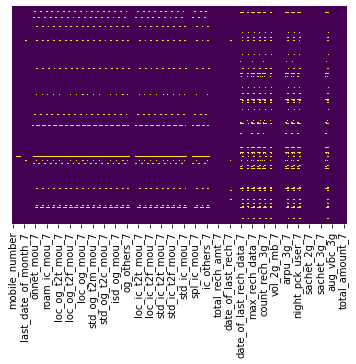

In [16]:
# Heatmap for checking the missing Value
sns.heatmap(telecom.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Handling Missing value

In [17]:
# Observing the null value in the data
(telecom[telecom.columns[telecom.isnull().any()]].isnull().sum() * 100 / telecom.shape[0]).sort_values(ascending=False)

fb_user_8               13.349225
av_rech_amt_data_8      13.349225
total_rech_data_8       13.349225
max_rech_data_8         13.349225
count_rech_2g_8         13.349225
                          ...    
std_og_t2o_mou           1.470004
loc_og_t2o_mou           1.470004
last_date_of_month_8     0.609191
date_of_last_rech_7      0.225136
last_date_of_month_7     0.092703
Length: 112, dtype: float64

In [18]:
telecom.fillna(0, inplace=True)

In [19]:
# Check the shap of the dataset
telecom.shape

(7551, 176)

In [20]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_amount_6,total_amount_7,avg_amount_6_7
33,7000149764,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,977.020,2362.833,...,1.0,1328,358.10,2706.83,1714.67,0.0,0,5290.0,20432.0,12861.0
53,7002188521,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,978.077,1141.296,...,0.0,697,0.00,0.00,0.00,0.0,0,348.0,580.0,464.0
56,7002180748,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,452.624,320.548,...,1.0,729,277.97,535.63,1459.45,0.0,0,618.0,3612.0,2115.0
57,7001682585,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1201.298,687.704,...,1.0,3106,1799.09,3649.39,1892.32,0.0,0,5248.0,656.0,2952.0
104,7002144559,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,143.313,80.257,...,1.0,315,209.94,103.13,292.58,0.0,0,552.0,436.0,494.0


#### Remove Unwanted Columns

In [21]:
telecom_obj_column = telecom.select_dtypes(['object']).columns
telecom_obj_column


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [22]:
telecom.drop(telecom_obj_column,axis = 1 ,inplace = True)
telecom.drop(['mobile_number'],axis = 1 ,inplace = True)

telecom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_amount_6,total_amount_7,avg_amount_6_7
33,109,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,0.00,...,1.0,1328,358.10,2706.83,1714.67,0.0,0,5290.0,20432.0,12861.0
53,109,0.0,0.0,0.0,978.077,1141.296,706.020,135.14,119.59,102.69,...,0.0,697,0.00,0.00,0.00,0.0,0,348.0,580.0,464.0
56,109,0.0,0.0,0.0,452.624,320.548,368.807,34.46,43.11,50.61,...,1.0,729,277.97,535.63,1459.45,0.0,0,618.0,3612.0,2115.0
57,109,0.0,0.0,0.0,1201.298,687.704,602.052,61.23,7.39,62.89,...,1.0,3106,1799.09,3649.39,1892.32,0.0,0,5248.0,656.0,2952.0
104,109,0.0,0.0,0.0,143.313,80.257,118.036,4.35,0.00,0.00,...,1.0,315,209.94,103.13,292.58,0.0,0,552.0,436.0,494.0


In [23]:
# Check the shap of the dataset
telecom.shape

(7551, 166)

In [24]:
telecom.describe()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Churn,total_amount_6,total_amount_7,avg_amount_6_7
count,7551.0,7551.0,7551.0,7551.0,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,...,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000,7551.000000
mean,109.0,0.0,0.0,0.0,496.980707,484.850585,441.694712,116.582857,115.052551,108.336508,...,0.847305,1074.659383,351.856977,397.612884,373.815207,15.571736,0.065289,1511.756317,1628.356732,1570.056524
std,0.0,0.0,0.0,0.0,439.986001,442.940589,444.327185,316.954434,330.375327,317.002407,...,0.359717,881.870467,621.005096,681.213099,659.170812,71.060016,0.247052,2538.018706,2498.246061,2081.759091
min,109.0,0.0,0.0,0.0,0.000000,-11.000000,-17.854000,0.000000,0.000000,0.000000,...,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,464.000000
25%,109.0,0.0,0.0,0.0,211.205500,198.045500,161.678000,1.710000,1.150000,0.750000,...,1.000000,418.000000,0.000000,0.000000,0.000000,0.000000,0.000000,456.000000,549.000000,631.500000
50%,109.0,0.0,0.0,0.0,376.701000,357.534000,312.454000,20.430000,18.090000,16.980000,...,1.000000,737.000000,75.090000,97.800000,85.410000,0.000000,0.000000,932.000000,1010.000000,977.000000
75%,109.0,0.0,0.0,0.0,641.429000,639.415500,576.025000,93.530000,88.620000,84.900000,...,1.000000,1437.000000,477.845000,535.160000,494.470000,0.000000,0.000000,1698.000000,1908.000000,1670.250000
max,109.0,0.0,0.0,0.0,6636.431000,5298.833000,6255.086000,6504.340000,8157.780000,9977.410000,...,1.000000,4321.000000,12916.220000,9165.600000,11166.210000,1611.520000,1.000000,105658.000000,55134.000000,56489.000000


In [25]:
X=telecom.drop('Churn', axis =1)
y=telecom.Churn

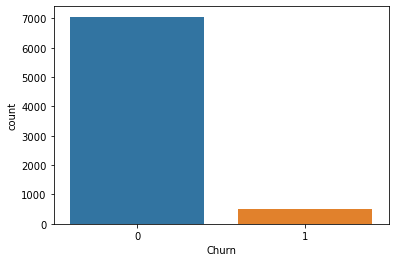

In [66]:
sns.countplot(x='Churn', data=telecom)

In [26]:
y.value_counts()

0    7058
1     493
Name: Churn, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

### PCA on the data

#### Note - 
- While computing the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
- So we'll calculate the PCs using the train data, and apply them later on the test data


In [28]:
from sklearn.decomposition import PCA

In [29]:
pca = PCA(random_state=100)

In [30]:
pca.fit(X_train)

PCA(random_state=100)

#### Components from the PCA

In [31]:
pca.components_

array([[-7.17996596e-19,  1.11022302e-16, -1.11022302e-16, ...,
         4.58695337e-01,  5.78884840e-01,  5.18790089e-01],
       [-5.72999189e-19,  5.55111512e-17,  1.38777878e-17, ...,
        -1.95466113e-01, -2.83380745e-01, -2.39423429e-01],
       [ 8.05058865e-19, -1.94289029e-16, -2.49800181e-16, ...,
         7.30107459e-01, -6.14906540e-01,  5.76004593e-02],
       ...,
       [-0.00000000e+00, -3.90571432e-03,  1.53724290e-03, ...,
        -7.09807142e-06, -7.09807142e-06,  1.41961428e-05],
       [ 0.00000000e+00,  1.38767131e-03, -5.20970062e-04, ...,
         2.87291081e-05,  2.87291081e-05, -5.74582162e-05],
       [ 9.99998578e-01, -1.41345370e-03,  4.11632353e-04, ...,
        -6.68944982e-05, -6.68944982e-05,  1.33788996e-04]])

Looking at the explained variance ratio for each component

In [32]:
pca.explained_variance_ratio_

array([4.34925807e-01, 1.57275781e-01, 1.20157257e-01, 6.81858442e-02,
       2.87368663e-02, 2.61263077e-02, 2.12675622e-02, 2.01430964e-02,
       1.78619136e-02, 1.48880914e-02, 1.39230355e-02, 1.14941457e-02,
       8.15176805e-03, 7.18155629e-03, 4.43582189e-03, 4.14934873e-03,
       3.64351179e-03, 3.47024748e-03, 2.91368896e-03, 2.72412850e-03,
       2.59058000e-03, 2.13767045e-03, 2.07419875e-03, 1.96162804e-03,
       1.80606693e-03, 1.63963608e-03, 1.43706120e-03, 1.32594002e-03,
       1.17855866e-03, 1.10960512e-03, 7.78346244e-04, 7.32713411e-04,
       7.14940838e-04, 6.88117515e-04, 6.01114083e-04, 5.76486253e-04,
       5.31567270e-04, 4.92383980e-04, 4.26974905e-04, 3.89056917e-04,
       3.78956944e-04, 3.58709086e-04, 3.02696993e-04, 2.93294115e-04,
       2.69815697e-04, 2.51542277e-04, 2.41546672e-04, 2.20359629e-04,
       2.19462766e-04, 2.11121423e-04, 2.04433978e-04, 1.83549731e-04,
       1.64536071e-04, 1.59495283e-04, 1.50761778e-04, 1.46734097e-04,
      

Making a scree plot for the explained variance

In [33]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

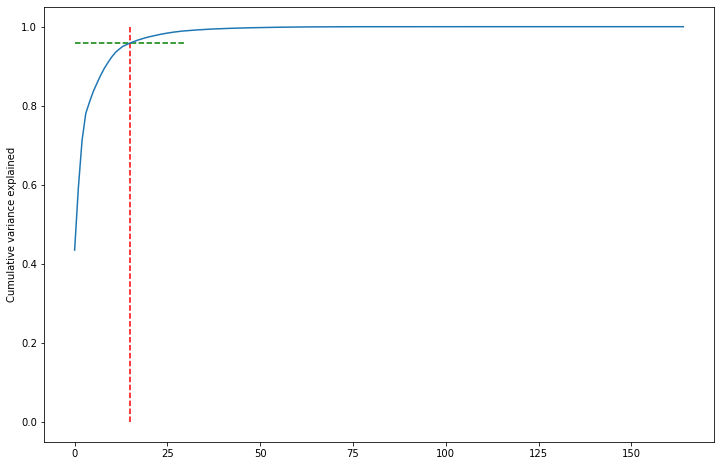

In [34]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.96, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 15 components

In [35]:
from sklearn.decomposition import IncrementalPCA

In [36]:
pca_final = IncrementalPCA(n_components=15)

In [37]:
df_train_pca = pca_final.fit_transform(X_train)

In [38]:
df_train_pca.shape

(5285, 15)

In [39]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [40]:
corrmat.shape

(15, 15)

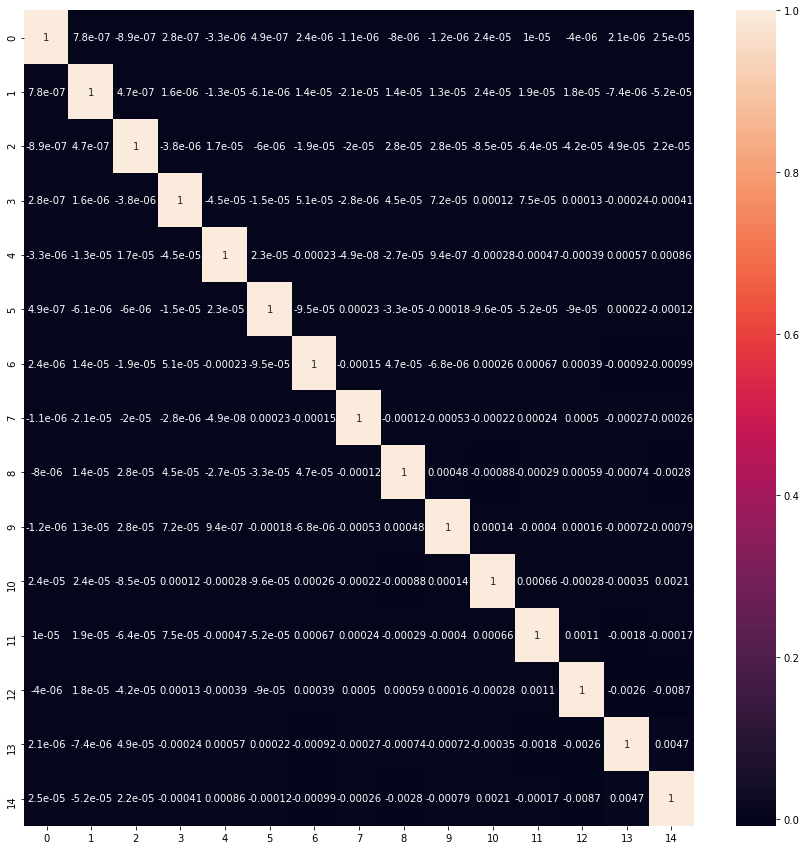

In [41]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [42]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(2266, 15)

### Applying logistic regression on the data on our Principal components

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
learner_pca = LogisticRegression()

In [45]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [46]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, recall_score


def get_score(model,X_train,X_test):
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy=",accuracy_score(y_test,y_pred))
    print('roc = ',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
    print('recall = ',recall_score(y_test, y_pred))

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=100, class_weight='balanced')

In [49]:
get_score(lr,X_train,X_test)

[[1696  428]
 [  25  117]]
Accuracy= 0.8000882612533098
roc =  0.8701791729662344
recall =  0.823943661971831


In [50]:
get_score(lr,df_train_pca,df_test_pca)

[[1583  541]
 [  27  115]]
Accuracy= 0.7493380406001765
roc =  0.8229688867669293
recall =  0.8098591549295775


#### As per the observation 15 PCA components is also providing almost the same result
##### As a result use PCA components for further Calculation

#### As per the Requirement we are select Random forest from the tree family to building the model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 100, n_estimators= 42,n_jobs =-1)
get_score(rf_clf,X_train,X_test)

[[2109   15]
 [  87   55]]
Accuracy= 0.9549867608120035
roc =  0.8642227659743773
recall =  0.3873239436619718


In [52]:
from sklearn.model_selection import GridSearchCV
params = { 'n_estimators':[100,150,200],
          'max_features': ['auto','sqrt'] ,
          'class_weight':['balanced','balanced_subsample'],
          'max_depth' : [4,6,8] , 
          'min_samples_leaf':[15,20,24],
          'criterion' : ['gini']
            }
grid_search = GridSearchCV(estimator = RandomForestClassifier(random_state = 42,n_jobs = -1 ), scoring = 'recall', cv =3,
                                                           param_grid = params)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini'], 'max_depth': [4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [15, 20, 24],
                         'n_estimators': [100, 150, 200]},
             scoring='recall')

In [53]:
grid_search.best_score_

0.6638176638176638

In [54]:
best_params=grid_search.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 20,
 'n_estimators': 100}

In [55]:
rf_clf_1 = RandomForestClassifier(random_state = 42,
                n_jobs = -1 ,
                class_weight='balanced',
                criterion= 'gini',
                max_depth= 4,
                max_features= 'auto',
                min_samples_leaf= 20,
                n_estimators= 100)
get_score(rf_clf_1,X_train,X_test)

[[2013  111]
 [  47   95]]
Accuracy= 0.9302736098852604
roc =  0.9182216652078194
recall =  0.6690140845070423


### XGBOOST Classifier

In [56]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

param_test = {
  'min_child_weight':[5,6],
  'max_depth': range(3,5),
  'gamma':[0,0.2,0.4]
    
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='recall',n_jobs=4,iid=False, cv=3)
gsearch.fit(X_train, y_train)
#print(gsearch.grid_scores_)
print("gsearch.best_params_",gsearch.best_params_)
print("gsearch.best_score_",gsearch.best_score_)

[23:51:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gsearch.best_params_ {'gamma': 0, 'max_depth': 3, 'min_child_weight': 5}
gsearch.best_score_ 0.47863247863247865


In [57]:
from xgboost import XGBClassifier
modelXg = XGBClassifier(learning_rate=0.1, n_estimators=150, max_depth=4, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8,
                      objective= 'binary:logistic',scale_pos_weight=3,seed=29)


modelXg.fit(X_train, y_train)
y_xg = modelXg.predict(X_test)

[23:51:26] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
from sklearn.metrics import precision_score, recall_score,f1_score
                                                  
print(confusion_matrix(y_test, y_xg))
predictions = [value for value in y_xg]
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
print("Accuracy_score: %.2f%% on test dataset" % (accuracy * 100.0))
print("precision_score: %.2f%% on test dataset" % (precision * 100.0))
print("recall_score: %.2f%% on test dataset" % (recall * 100.0))
print("f1_score: %.2f%% on test dataset" % (f1 * 100.0))
print("roc_auc test set", roc_auc_score(y_test, modelXg.predict_proba(X_test)[:,1]))
print("roc_auc training set", roc_auc_score(y_train, modelXg.predict_proba(X_train)[:,1]))

[[2089   35]
 [  66   76]]
Accuracy_score: 95.54% on test dataset
precision_score: 68.47% on test dataset
recall_score: 53.52% on test dataset
f1_score: 60.08% on test dataset
roc_auc test set 0.9293221665207819
roc_auc training set 0.9980667893112157


## Feature Importance Using XGBOOST

In [59]:
from xgboost import XGBClassifier
from xgboost import plot_importance
import matplotlib.pyplot as plt

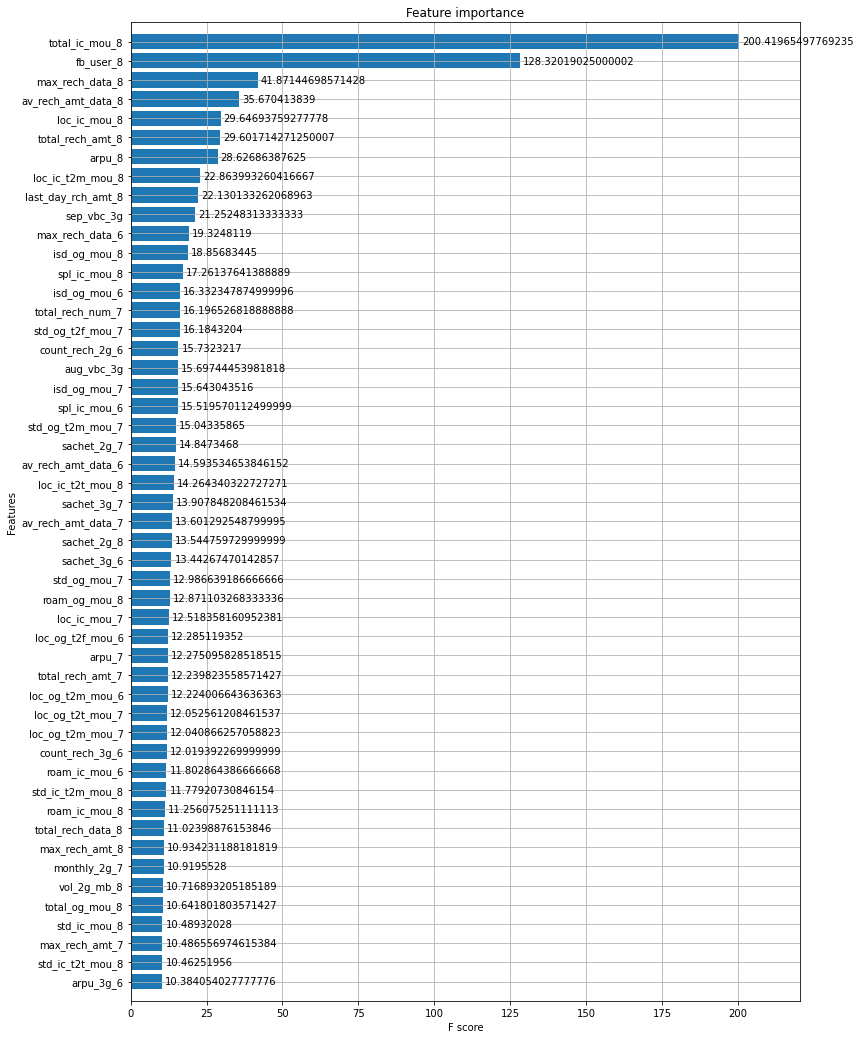

In [60]:
fig, ax = plt.subplots(figsize=(12,18))
plot_importance(modelXg,importance_type='gain', max_num_features=50, height=0.8, ax=ax)
plt.show()

### Feature Selection with XGBoostFeature Importance Scores

In [61]:
# use feature importance for feature selection
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

# select features using threshold
selection = SelectFromModel(modelXg, threshold=0.06, prefit=True)
select_X_train = selection.transform(X_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
# eval model
select_X_test = selection.transform(X_test)
y_pred = selection_model.predict(select_X_test)
accuracy_score(y_test,y_pred)

[23:51:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9532215357458076